In [1]:
#Import necessary libraraies
import numpy as np
import pandas as pd

### Invoiced Data

In [3]:
in_df = pd.read_excel('invoiced_jobs_this_year_2024-09-12T18_36_36.439126Z.xlsx', sheet_name='Query result')
in_df.head()

,Project Code Child,Project Code Parent,Project Name,Project Manager,Project Status,Service Type,Invoiced Date,Actual Project Revenue,Vendor Cost ($),Client Name,Category,Complete,CPI,Actual Ir,Actual Loi,Project Tags,Countries,Audience
0,NAV19014-02,19014,OR-PR-151450.1 Consumer,Daniel Mitchell,Invoiced,SampleOnly,2024-01-02,374.5,142.309998,Harris Insights & Analytics LLC,Consumer,107,3.5,38.768116,9.199324,NaN,[],NaN
1,NAV19411-01,19411,Non-users of all tobacco/nicotine - UK,Katie Pappenhagen,Invoiced,FullService,2024-01-08,8008.0,3356.500000,Povaddo,Consumer,1001,8.0,47.780430,7.518580,NaN,"[""United Kingdom""]","Geo,Gen Pop"
2,NAV19411-02,19411,Non-users of all tobacco/nicotine - Japan,Katie Pappenhagen,Invoiced,FullService,2024-01-08,8008.0,2730.000000,Povaddo,Consumer,1001,8.0,81.981982,6.534565,NaN,"[""Japan""]","Geo,Gen Pop"
3,NAV19411-03,19411,Non-users of all tobacco/nicotine - Korea,Katie Pappenhagen,Invoiced,FullService,2024-01-08,9009.0,2634.800049,Povaddo,Consumer,1001,9.0,48.568656,6.745110,NaN,"[""South Korea""]","Geo,Gen Pop"
4,NAV19411-04,19411,Non-users of all tobacco/nicotine - Indonesia,Katie Pappenhagen,Invoiced,FullService,2024-01-08,9090.0,3345.449951,Povaddo,Consumer,1010,9.0,38.257576,9.947199,NaN,"[""Indonesia""]","Geo,Gen Pop"


In [4]:
#get data info
in_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Project Code Child      671 non-null    object        
 1   Project Code Parent     671 non-null    int64         
 2   Project Name            671 non-null    object        
 3   Project Manager         671 non-null    object        
 4   Project Status          671 non-null    object        
 5   Service Type            671 non-null    object        
 6   Invoiced Date           671 non-null    datetime64[ns]
 7   Actual Project Revenue  671 non-null    float64       
 8   Vendor Cost ($)         671 non-null    float64       
 9   Client Name             671 non-null    object        
 10  Category                671 non-null    object        
 11  Complete                671 non-null    int64         
 12  CPI                     671 non-null    float64   

In [5]:
#drop unnecessary columns
in_df.drop(columns=['Project Code Child','Project Name', 'Project Code Parent', 'Project Manager', 'Project Status','Service Type', 'Vendor Cost ($)', 'Project Tags', 'Countries', 'Audience', 'Invoiced Date'], inplace=True)
in_df.head()

,Actual Project Revenue,Client Name,Category,Complete,CPI,Actual Ir,Actual Loi
0,374.5,Harris Insights & Analytics LLC,Consumer,107,3.5,38.768116,9.199324
1,8008.0,Povaddo,Consumer,1001,8.0,47.780430,7.518580
2,8008.0,Povaddo,Consumer,1001,8.0,81.981982,6.534565
3,9009.0,Povaddo,Consumer,1001,9.0,48.568656,6.745110
4,9090.0,Povaddo,Consumer,1010,9.0,38.257576,9.947199


In [6]:
#Round up float values to decimal places
in_df['Actual Project Revenue'] = in_df['Actual Project Revenue'].round(2)
in_df['Actual Ir'] = in_df['Actual Ir'].round(2)
in_df['Actual Loi'] = in_df['Actual Loi'].round(2)
in_df['CPI'] = in_df['CPI'].round(2)
in_df.head()

,Actual Project Revenue,Client Name,Category,Complete,CPI,Actual Ir,Actual Loi
0,374.5,Harris Insights & Analytics LLC,Consumer,107,3.5,38.77,9.20
1,8008.0,Povaddo,Consumer,1001,8.0,47.78,7.52
2,8008.0,Povaddo,Consumer,1001,8.0,81.98,6.53
3,9009.0,Povaddo,Consumer,1001,9.0,48.57,6.75
4,9090.0,Povaddo,Consumer,1010,9.0,38.26,9.95


### EDA

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#Check the statistics
in_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Actual Project Revenue,671.0,5293.400328,7022.737798,18.00,1399.75,3300.00,6671.400,67600.00
Complete,671.0,779.791356,1593.138992,1.00,106.00,360.00,1000.000,25999.00
CPI,671.0,13.336662,16.573899,2.00,5.25,8.00,15.000,128.84
Actual Ir,671.0,34.190686,29.676474,0.20,10.86,22.83,52.705,100.00
Actual Loi,671.0,337.907198,8359.000117,1.21,9.89,14.39,18.540,216543.89


In [10]:
#Choose only numeric columns in a list
numeric_cols = in_df.drop(columns=['Category']).select_dtypes(include='number').columns
num_cols = len(numeric_cols)

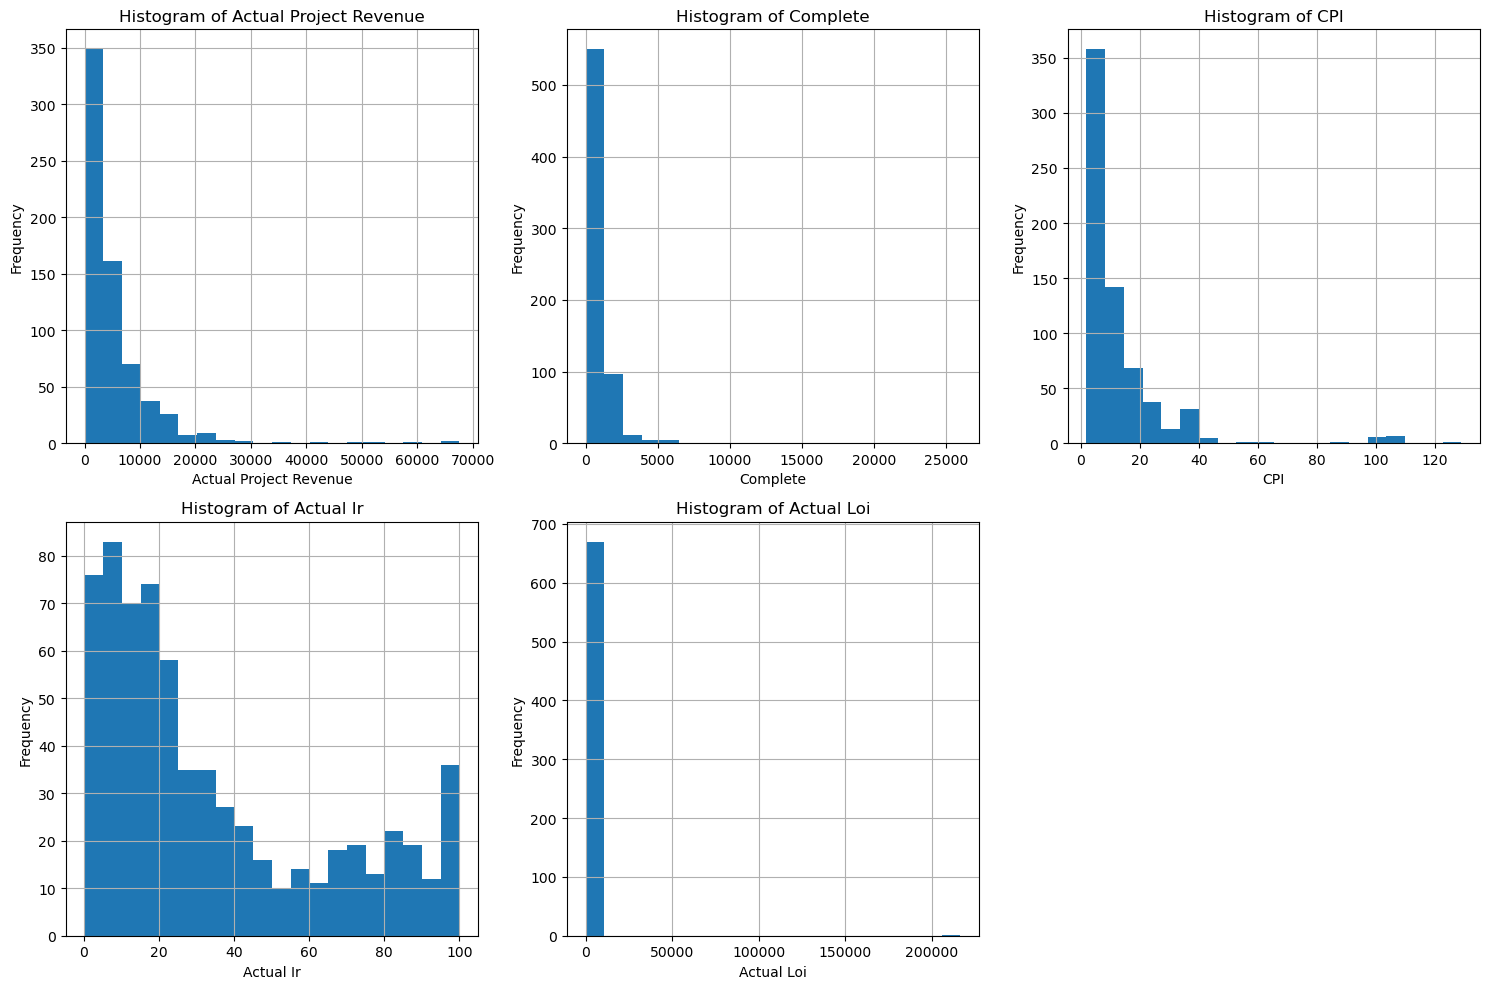

In [11]:
#Plot histograms to understand the structure of the data
if num_cols == 0:
    print("No numeric columns found in the DataFrame.")


num_rows = int(num_cols**0.5)  
num_cols_grid = (num_cols + num_rows - 1) // num_rows  

fig, axes = plt.subplots(num_rows, num_cols_grid, figsize=(15, 10))
# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    ax = axes[i]
    ax.hist(in_df[col], bins=20)
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.grid(True)

# Remove any unused axes
if num_cols < len(axes):
    for j in range(num_cols, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Histograms only explain the skewness in the data, but do not clearly display the outliers. Hence we use boxplots

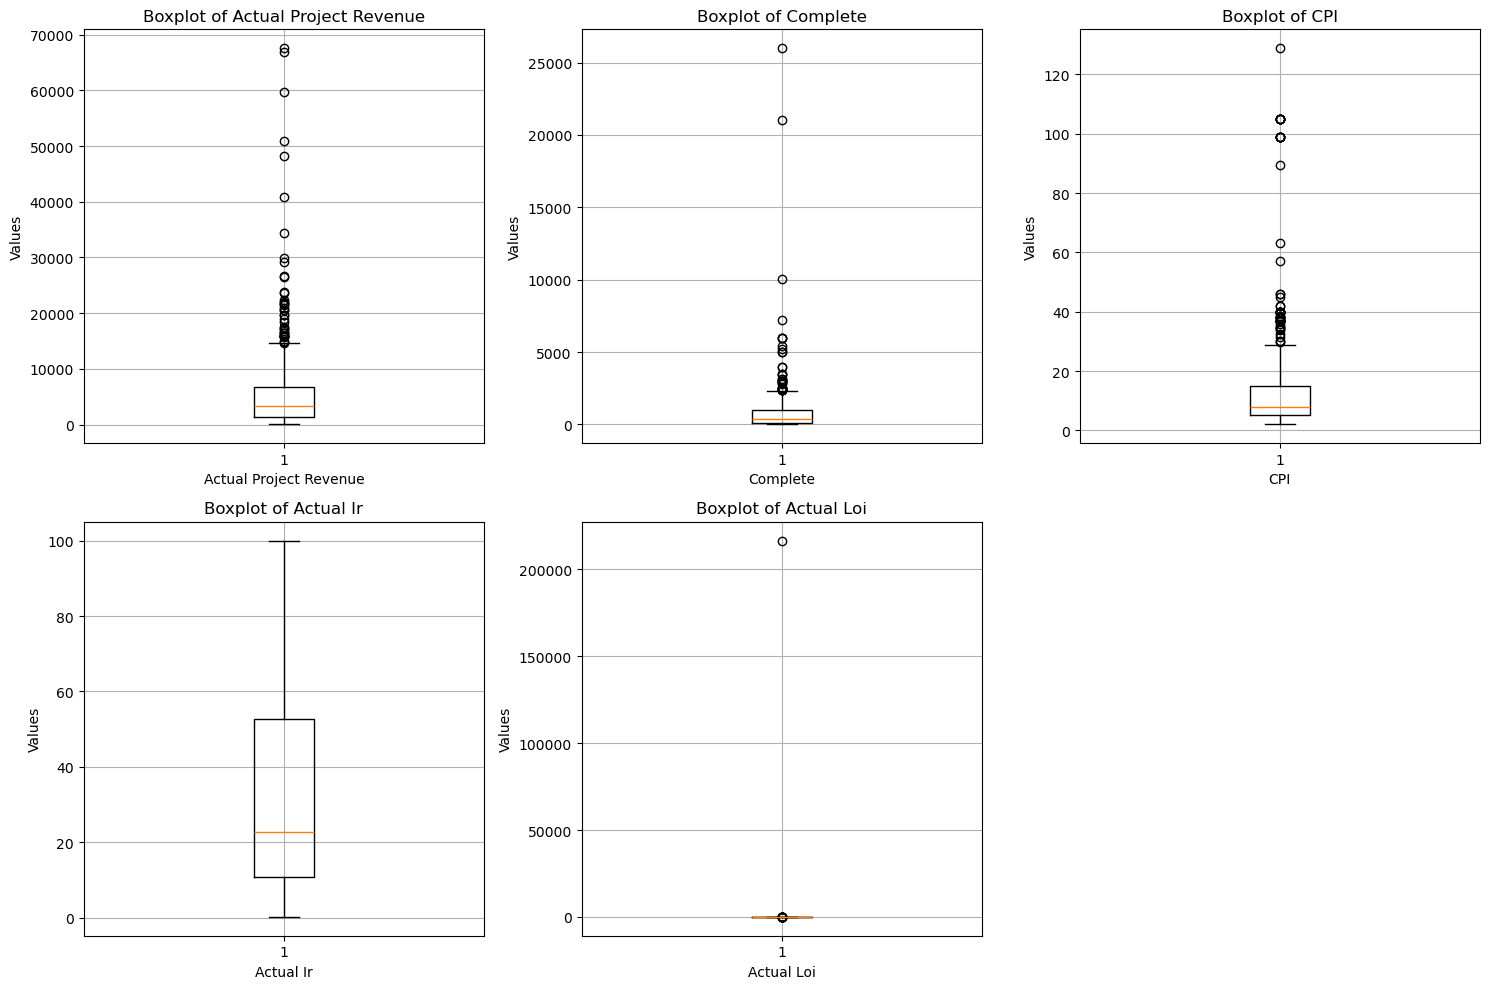

In [13]:
#Boxplots
fig, axes = plt.subplots(num_rows, num_cols_grid, figsize=(15,10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    ax = axes[i]
    ax.boxplot(in_df[col])
    ax.set_title(f'Boxplot of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Values')
    ax.grid(True)

if num_cols < len(axes):
    for j in range(num_cols, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [14]:
#data before removing outliers
in_df.shape

(671, 7)

### Removing Outliers 

#### IQR

In [17]:
in_df_cleaned = in_df.copy()
for col in numeric_cols:
    Q1 = in_df_cleaned[col].quantile(0.25)
    Q3 = in_df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    in_df_cleaned = in_df_cleaned[(in_df_cleaned[col] >= lower_bound) & (in_df_cleaned[col] <= upper_bound)]

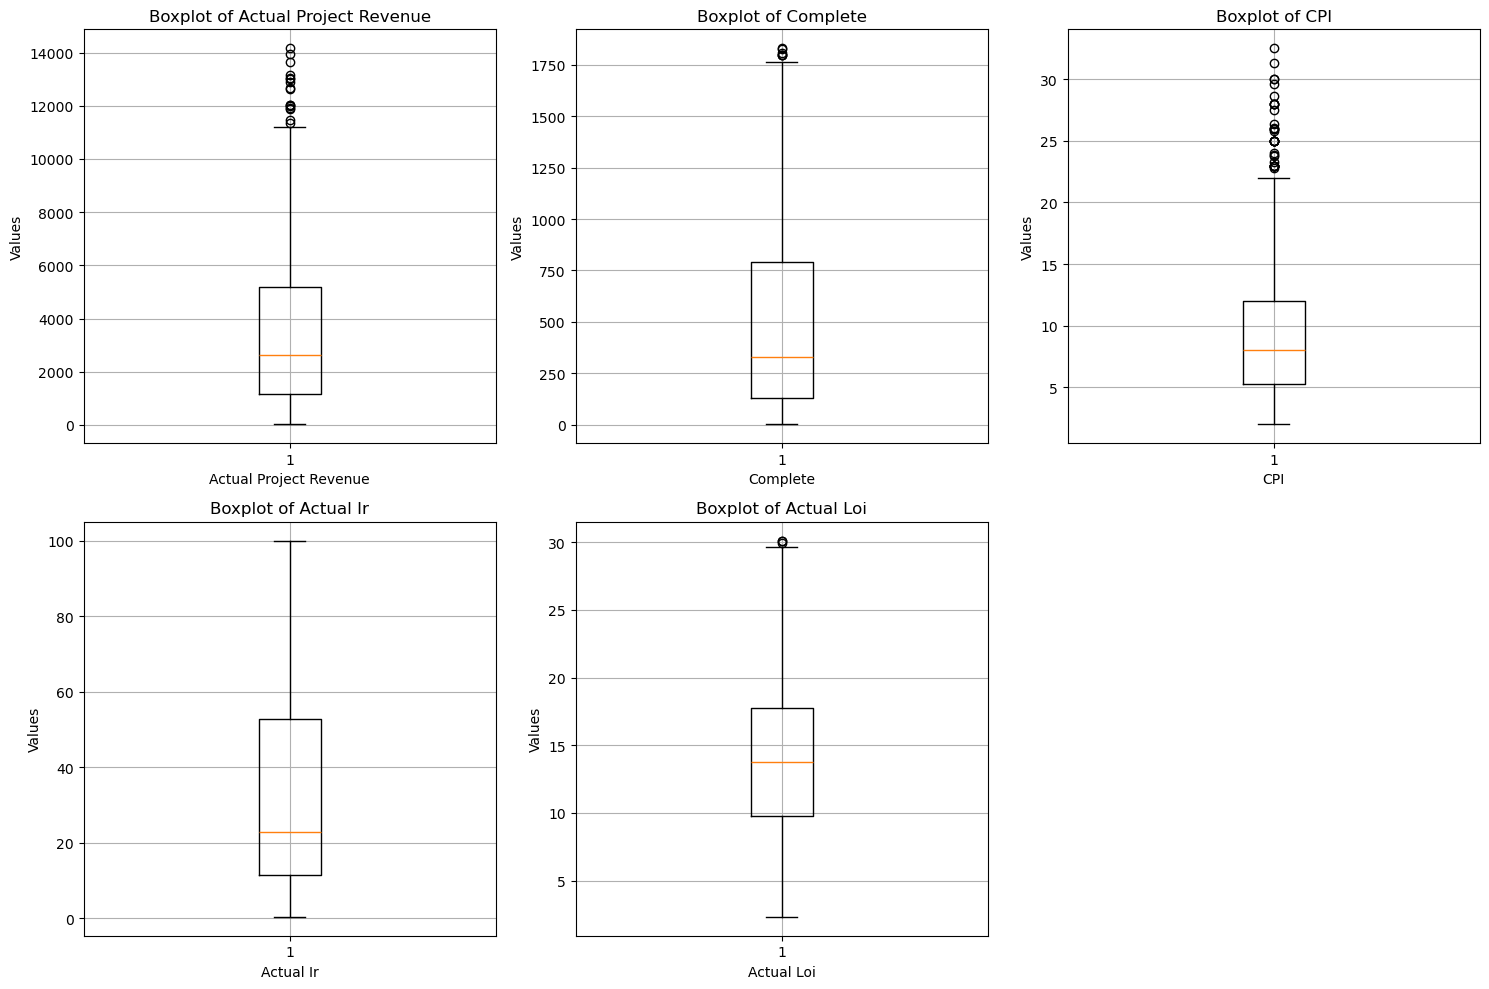

In [18]:
#boxplot after removing outliers using IQR method
fig, axes = plt.subplots(num_rows, num_cols_grid, figsize=(15,10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    ax = axes[i]
    ax.boxplot(in_df_cleaned[col])
    ax.set_title(f'Boxplot of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Values')
    ax.grid(True)

if num_cols < len(axes):
    for j in range(num_cols, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [19]:
#data shape after removing outliers
in_df_cleaned.shape

(517, 7)

In [20]:
in_df_cleaned['Status'] = 'Invoiced'
in_df_cleaned=in_df_cleaned.rename(columns = {'Actual Ir':'IR', 'Actual Loi':'LOI'})
in_df_cleaned.head()

,Actual Project Revenue,Client Name,Category,Complete,CPI,IR,LOI,Status
0,374.5,Harris Insights & Analytics LLC,Consumer,107,3.5,38.77,9.20,Invoiced
1,8008.0,Povaddo,Consumer,1001,8.0,47.78,7.52,Invoiced
2,8008.0,Povaddo,Consumer,1001,8.0,81.98,6.53,Invoiced
3,9009.0,Povaddo,Consumer,1001,9.0,48.57,6.75,Invoiced
4,9090.0,Povaddo,Consumer,1010,9.0,38.26,9.95,Invoiced


In [21]:
#Save data to excel files
in_df_cleaned.to_excel('in_new.xlsx', index=False)

In [22]:
# in_newdf = pd.read_excel('All+2024+Invoiced+through+91124 IU.xlsx')
# in_newdf.head()

In [23]:
# in_newdf.info()

In [24]:
# in_newdf=in_newdf.drop(columns = ['Record Id', 'Service Type', 'Subject'])

In [25]:
# in_newdf["Respondent Type"] = in_newdf["Respondent Type"].str.replace("^Services - ", "", regex=True)
# in_newdf.head()

In [26]:
# in_newdf =in_newdf.rename(columns = {'Account Name':'Client Name', 'Respondent Type':'Category','Launch Status':'Status'})
# in_newdf.head()

In [27]:
# matching_records = pd.merge(
#     in_df_cleaned, 
#     in_newdf, 
#     on=['Client Name', 'Category'], 
#     how='inner'
# )

# matching_records.info()
# #in_newdf.info()

In [28]:
# only_in_in_df_cleaned = pd.merge(
#     in_df_cleaned,
#     in_newdf,
#     on=['Client Name', 'Category'],
#     how='left',
#     indicator=True
# )

# # Now filter rows where merge indicator says "left_only"
# only_in_in_df_cleaned = only_in_in_df_cleaned[only_in_in_df_cleaned['_merge'] == 'left_only']

# # (Optional) Drop the _merge helper column
# only_in_in_df_cleaned = only_in_in_df_cleaned.drop(columns=['_merge'])

# only_in_in_df_cleaned.info()

In [29]:
# in_final = pd.merge(in_df_cleaned, in_newdf, on=['Client Name', 'Category'], how='left')
# in_final.head()

In [30]:
# in_final = in_final.drop_duplicates()
# in_final.info()

In [31]:
# in_final['Status'] = in_final['Status'].fillna('Invoiced')
# in_final.head()

In [32]:
# in_final =in_final.rename(columns = {'Actual Ir':'IR', 'Actual Loi':'LOI'})
# in_final.info()
# in_final.to_excel('in_new.xlsx', index=False)

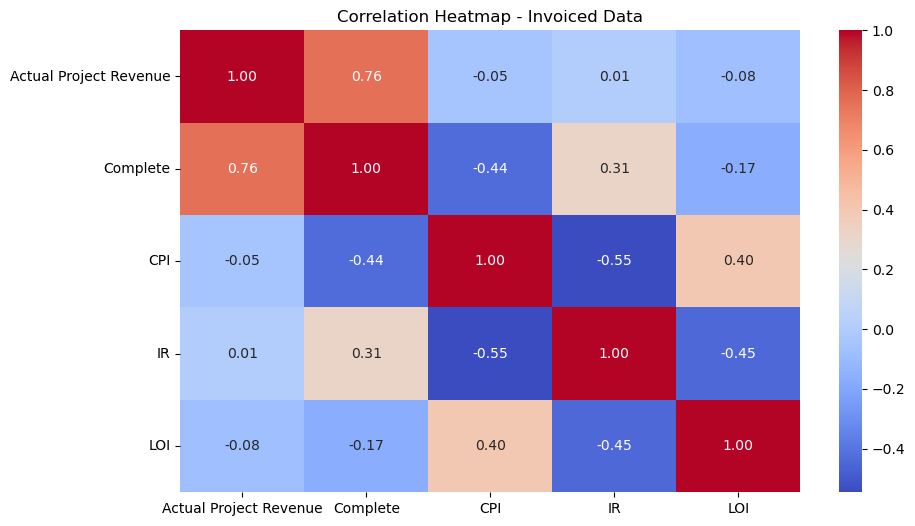

In [33]:
# Correlation heatmap
in_df_cleaned1 = in_df_cleaned.select_dtypes(include=np.number)
plt.figure(figsize=(10, 6))
sns.heatmap(in_df_cleaned1.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap - Invoiced Data")
plt.show()

### Lost Deal Data

In [35]:
#import lost deals data
lost_df = pd.read_excel('Deal+Item+Report+LOST.xlsx',  sheet_name='Sheet0')
lost_df.head()

,Record Id,Record Id (Items),Item,Description (Items),Qty,IR,LOI,Customer Rate,Item Amount,Deal Name,Account Name,Amount
0,zcrm_4508063000171830097,zcrm_4508063000171830098,Sample,CA,50.0,8.0,20.0,35.0,1750.0,APPD RoW 2025,Management Insight Technologies,22140.0
1,zcrm_4508063000171830097,zcrm_4508063000171830099,Sample,MX,20.0,4.0,20.0,40.0,800.0,APPD RoW 2025,Management Insight Technologies,22140.0
2,zcrm_4508063000171830097,zcrm_4508063000171830100,Sample,Argentina,40.0,2.0,20.0,42.0,1680.0,APPD RoW 2025,Management Insight Technologies,22140.0
3,zcrm_4508063000171830097,zcrm_4508063000171830101,Sample,Chile,10.0,5.0,20.0,40.0,400.0,APPD RoW 2025,Management Insight Technologies,22140.0
4,zcrm_4508063000171830097,zcrm_4508063000171830102,Sample,Peru,15.0,2.0,20.0,40.0,600.0,APPD RoW 2025,Management Insight Technologies,22140.0


In [36]:
file1 = pd.read_excel('Deal+Item+Report+LOST IU.xlsx') 
file1.head()

,Record Id,Record Id (Items),Item,Bid Number,Respondent Type,Description (Items),Qty,IR,LOI,Customer Rate,Item Amount,Deal Name,Account Name,Amount
0,zcrm_4508063000168351101,zcrm_4508063000168351102,Sample,23027B,Services - Consumer,NaN,1000.0,80.0,10.0,2.5,2500.0,Monthly Gen Pop - February - Wave,Inspired Insight,2500.0
1,zcrm_4508063000168351051,zcrm_4508063000168351052,Sample,23026B,Services - Consumer,Diagnosed CKD,45.0,20.0,30.0,38.0,1710.0,5772_PROJECT BID: FEB 2025 Chronic Kidney Dise...,Comscore,1710.0
2,zcrm_4508063000168351001,zcrm_4508063000168351002,Sample,23025B,Services - Consumer,Diagnosed CKD,45.0,20.0,30.0,38.0,1710.0,5772_PROJECT BID: Feb 2025 Chronic Kidney Dise...,Comscore,1710.0
3,zcrm_4508063000164517050,zcrm_4508063000164517051,Sample,22848B,Services - Consumer,TX,400.0,21.0,18.0,9.0,3600.0,2025 Texas English Ad Tracker Bid Request,Radius Global Market Research,4500.0
4,zcrm_4508063000164258139,zcrm_4508063000164258194,Sample,22842B,Services - Consumer,Age 63-67,600.0,30.0,18.0,5.5,3300.0,Medicare Materials,TRC Market Research,3300.0


In [37]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3425 entries, 0 to 3424
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Record Id            3425 non-null   object 
 1   Record Id (Items)    3326 non-null   object 
 2   Item                 3325 non-null   object 
 3   Bid Number           3425 non-null   object 
 4   Respondent Type      3425 non-null   object 
 5   Description (Items)  2239 non-null   object 
 6   Qty                  3307 non-null   float64
 7   IR                   2608 non-null   float64
 8   LOI                  2617 non-null   float64
 9   Customer Rate        3308 non-null   float64
 10  Item Amount          3326 non-null   float64
 11  Deal Name            3425 non-null   object 
 12  Account Name         3425 non-null   object 
 13  Amount               3287 non-null   float64
dtypes: float64(6), object(8)
memory usage: 374.7+ KB


In [38]:
lost_df = lost_df.merge(
    file1[['Record Id (Items)','Record Id', 'Respondent Type']],
    on=['Record Id (Items)', 'Record Id'],
    how='left'
)
lost_df.head()

,Record Id,Record Id (Items),Item,Description (Items),Qty,IR,LOI,Customer Rate,Item Amount,Deal Name,Account Name,Amount,Respondent Type
0,zcrm_4508063000171830097,zcrm_4508063000171830098,Sample,CA,50.0,8.0,20.0,35.0,1750.0,APPD RoW 2025,Management Insight Technologies,22140.0,NaN
1,zcrm_4508063000171830097,zcrm_4508063000171830099,Sample,MX,20.0,4.0,20.0,40.0,800.0,APPD RoW 2025,Management Insight Technologies,22140.0,NaN
2,zcrm_4508063000171830097,zcrm_4508063000171830100,Sample,Argentina,40.0,2.0,20.0,42.0,1680.0,APPD RoW 2025,Management Insight Technologies,22140.0,NaN
3,zcrm_4508063000171830097,zcrm_4508063000171830101,Sample,Chile,10.0,5.0,20.0,40.0,400.0,APPD RoW 2025,Management Insight Technologies,22140.0,NaN
4,zcrm_4508063000171830097,zcrm_4508063000171830102,Sample,Peru,15.0,2.0,20.0,40.0,600.0,APPD RoW 2025,Management Insight Technologies,22140.0,NaN


In [39]:
lost_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3492 entries, 0 to 3491
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Record Id            3492 non-null   object 
 1   Record Id (Items)    3391 non-null   object 
 2   Item                 3390 non-null   object 
 3   Description (Items)  2286 non-null   object 
 4   Qty                  3372 non-null   float64
 5   IR                   2661 non-null   float64
 6   LOI                  2671 non-null   float64
 7   Customer Rate        3373 non-null   float64
 8   Item Amount          3391 non-null   float64
 9   Deal Name            3492 non-null   object 
 10  Account Name         3492 non-null   object 
 11  Amount               3352 non-null   float64
 12  Respondent Type      3424 non-null   object 
dtypes: float64(6), object(7)
memory usage: 354.8+ KB


In [40]:
lost_df_ids = set(lost_df[['Record Id (Items)', 'Record Id']].apply(tuple, axis=1))
file1_ids = set(file1[['Record Id (Items)', 'Record Id']].apply(tuple, axis=1))

missing_ids = file1_ids - lost_df_ids

# Now find missing records
new_records = file1[file1[['Record Id (Items)', 'Record Id']].apply(tuple, axis=1).isin(missing_ids)]

# Step 4: Append missing records
final = pd.concat([lost_df, new_records], ignore_index=True)
final.head()

,Record Id,Record Id (Items),Item,Description (Items),Qty,IR,LOI,Customer Rate,Item Amount,Deal Name,Account Name,Amount,Respondent Type,Bid Number
0,zcrm_4508063000171830097,zcrm_4508063000171830098,Sample,CA,50.0,8.0,20.0,35.0,1750.0,APPD RoW 2025,Management Insight Technologies,22140.0,NaN,NaN
1,zcrm_4508063000171830097,zcrm_4508063000171830099,Sample,MX,20.0,4.0,20.0,40.0,800.0,APPD RoW 2025,Management Insight Technologies,22140.0,NaN,NaN
2,zcrm_4508063000171830097,zcrm_4508063000171830100,Sample,Argentina,40.0,2.0,20.0,42.0,1680.0,APPD RoW 2025,Management Insight Technologies,22140.0,NaN,NaN
3,zcrm_4508063000171830097,zcrm_4508063000171830101,Sample,Chile,10.0,5.0,20.0,40.0,400.0,APPD RoW 2025,Management Insight Technologies,22140.0,NaN,NaN
4,zcrm_4508063000171830097,zcrm_4508063000171830102,Sample,Peru,15.0,2.0,20.0,40.0,600.0,APPD RoW 2025,Management Insight Technologies,22140.0,NaN,NaN


In [41]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Record Id            3493 non-null   object 
 1   Record Id (Items)    3392 non-null   object 
 2   Item                 3391 non-null   object 
 3   Description (Items)  2287 non-null   object 
 4   Qty                  3373 non-null   float64
 5   IR                   2662 non-null   float64
 6   LOI                  2672 non-null   float64
 7   Customer Rate        3374 non-null   float64
 8   Item Amount          3392 non-null   float64
 9   Deal Name            3493 non-null   object 
 10  Account Name         3493 non-null   object 
 11  Amount               3353 non-null   float64
 12  Respondent Type      3425 non-null   object 
 13  Bid Number           1 non-null      object 
dtypes: float64(6), object(8)
memory usage: 382.2+ KB


In [42]:
duplicates = final.duplicated()
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [43]:
#Filter data by item=Sample
final = final[(final['Item'] == 'Sample')]
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2694 entries, 0 to 3492
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Record Id            2694 non-null   object 
 1   Record Id (Items)    2694 non-null   object 
 2   Item                 2694 non-null   object 
 3   Description (Items)  2023 non-null   object 
 4   Qty                  2689 non-null   float64
 5   IR                   2654 non-null   float64
 6   LOI                  2655 non-null   float64
 7   Customer Rate        2687 non-null   float64
 8   Item Amount          2694 non-null   float64
 9   Deal Name            2694 non-null   object 
 10  Account Name         2694 non-null   object 
 11  Amount               2657 non-null   float64
 12  Respondent Type      2640 non-null   object 
 13  Bid Number           1 non-null      object 
dtypes: float64(6), object(8)
memory usage: 315.7+ KB


In [44]:
#Get indices of records with item amount and amount both equal to 0
indices_to_drop = final.loc[(final['Item Amount'] == 0 ) | (final['Item Amount'] == 0 ) ].index
# Drop rows with those indices
final.drop(indices_to_drop, inplace = True)
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2686 entries, 0 to 3492
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Record Id            2686 non-null   object 
 1   Record Id (Items)    2686 non-null   object 
 2   Item                 2686 non-null   object 
 3   Description (Items)  2019 non-null   object 
 4   Qty                  2686 non-null   float64
 5   IR                   2651 non-null   float64
 6   LOI                  2652 non-null   float64
 7   Customer Rate        2686 non-null   float64
 8   Item Amount          2686 non-null   float64
 9   Deal Name            2686 non-null   object 
 10  Account Name         2686 non-null   object 
 11  Amount               2652 non-null   float64
 12  Respondent Type      2632 non-null   object 
 13  Bid Number           1 non-null      object 
dtypes: float64(6), object(8)
memory usage: 314.8+ KB


In [45]:
#Fill null values for records with common deal name
final['Qty'] = final['Qty'].fillna(final.groupby('Deal Name')['Qty'].transform('mean').round(2))
final['IR'] = final['IR'].fillna(final.groupby('Deal Name')['IR'].transform('mean').round(2))
final['LOI'] = final['LOI'].fillna(final.groupby('Deal Name')['LOI'].transform('mean').round(2))
final['Customer Rate'] = final['Customer Rate'].fillna(final.groupby('Deal Name')['Customer Rate'].transform('mean').round(2))
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2686 entries, 0 to 3492
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Record Id            2686 non-null   object 
 1   Record Id (Items)    2686 non-null   object 
 2   Item                 2686 non-null   object 
 3   Description (Items)  2019 non-null   object 
 4   Qty                  2686 non-null   float64
 5   IR                   2662 non-null   float64
 6   LOI                  2661 non-null   float64
 7   Customer Rate        2686 non-null   float64
 8   Item Amount          2686 non-null   float64
 9   Deal Name            2686 non-null   object 
 10  Account Name         2686 non-null   object 
 11  Amount               2652 non-null   float64
 12  Respondent Type      2632 non-null   object 
 13  Bid Number           1 non-null      object 
dtypes: float64(6), object(8)
memory usage: 314.8+ KB


In [46]:
#Drop unnecessary columns
final.drop(columns=['Record Id', 'Record Id (Items)', 'Description (Items)', 'Item','Amount', 'Bid Number', 'Deal Name'], inplace=True)
final.head()

,Qty,IR,LOI,Customer Rate,Item Amount,Account Name,Respondent Type
0,50.0,8.0,20.0,35.0,1750.0,Management Insight Technologies,NaN
1,20.0,4.0,20.0,40.0,800.0,Management Insight Technologies,NaN
2,40.0,2.0,20.0,42.0,1680.0,Management Insight Technologies,NaN
3,10.0,5.0,20.0,40.0,400.0,Management Insight Technologies,NaN
4,15.0,2.0,20.0,40.0,600.0,Management Insight Technologies,NaN


In [47]:
#Fill null values with mean 
final['IR'] = final['IR'].fillna(value=final['LOI'].mean().round(2))
final['LOI'] = final['LOI'].fillna(value=final['LOI'].mean().round(2))
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2686 entries, 0 to 3492
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Qty              2686 non-null   float64
 1   IR               2686 non-null   float64
 2   LOI              2686 non-null   float64
 3   Customer Rate    2686 non-null   float64
 4   Item Amount      2686 non-null   float64
 5   Account Name     2686 non-null   object 
 6   Respondent Type  2632 non-null   object 
dtypes: float64(5), object(2)
memory usage: 167.9+ KB


In [48]:
final["Respondent Type"] = final["Respondent Type"].str.replace(r'\s*Services\s*-\s*', '', regex=True)
final =final.rename(columns = {'Account Name':'Client Name', 'Respondent Type':'Category', 'Qty':'Complete','Customer Rate': 'CPI','Item Amount':'Actual Project Revenue'})
final.head()

,Complete,IR,LOI,CPI,Actual Project Revenue,Client Name,Category
0,50.0,8.0,20.0,35.0,1750.0,Management Insight Technologies,NaN
1,20.0,4.0,20.0,40.0,800.0,Management Insight Technologies,NaN
2,40.0,2.0,20.0,42.0,1680.0,Management Insight Technologies,NaN
3,10.0,5.0,20.0,40.0,400.0,Management Insight Technologies,NaN
4,15.0,2.0,20.0,40.0,600.0,Management Insight Technologies,NaN


In [49]:
final = final.dropna(subset=['Category'])
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2632 entries, 19 to 3492
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Complete                2632 non-null   float64
 1   IR                      2632 non-null   float64
 2   LOI                     2632 non-null   float64
 3   CPI                     2632 non-null   float64
 4   Actual Project Revenue  2632 non-null   float64
 5   Client Name             2632 non-null   object 
 6   Category                2632 non-null   object 
dtypes: float64(5), object(2)
memory usage: 164.5+ KB


### EDA

In [51]:
#Check the statistics
final.describe().T

,count,mean,std,min,25%,50%,75%,max
Complete,2632.0,915.136018,3942.542053,1.0,150.0,400.000,1000.0,185224.0
IR,2632.0,38.262272,30.712106,1.0,20.0,30.000,58.0,1000.0
LOI,2632.0,15.641717,6.279825,1.0,12.0,15.000,20.0,158.0
CPI,2632.0,74.275532,1409.349562,1.0,6.0,11.750,40.0,52375.0
Actual Project Revenue,2632.0,11295.684347,21854.253689,1.0,2230.0,5260.625,12000.0,555672.0


In [52]:
#Select only numeric columns in a list
l_numeric_cols = final.select_dtypes(include='number').columns
num_cols = len(l_numeric_cols)

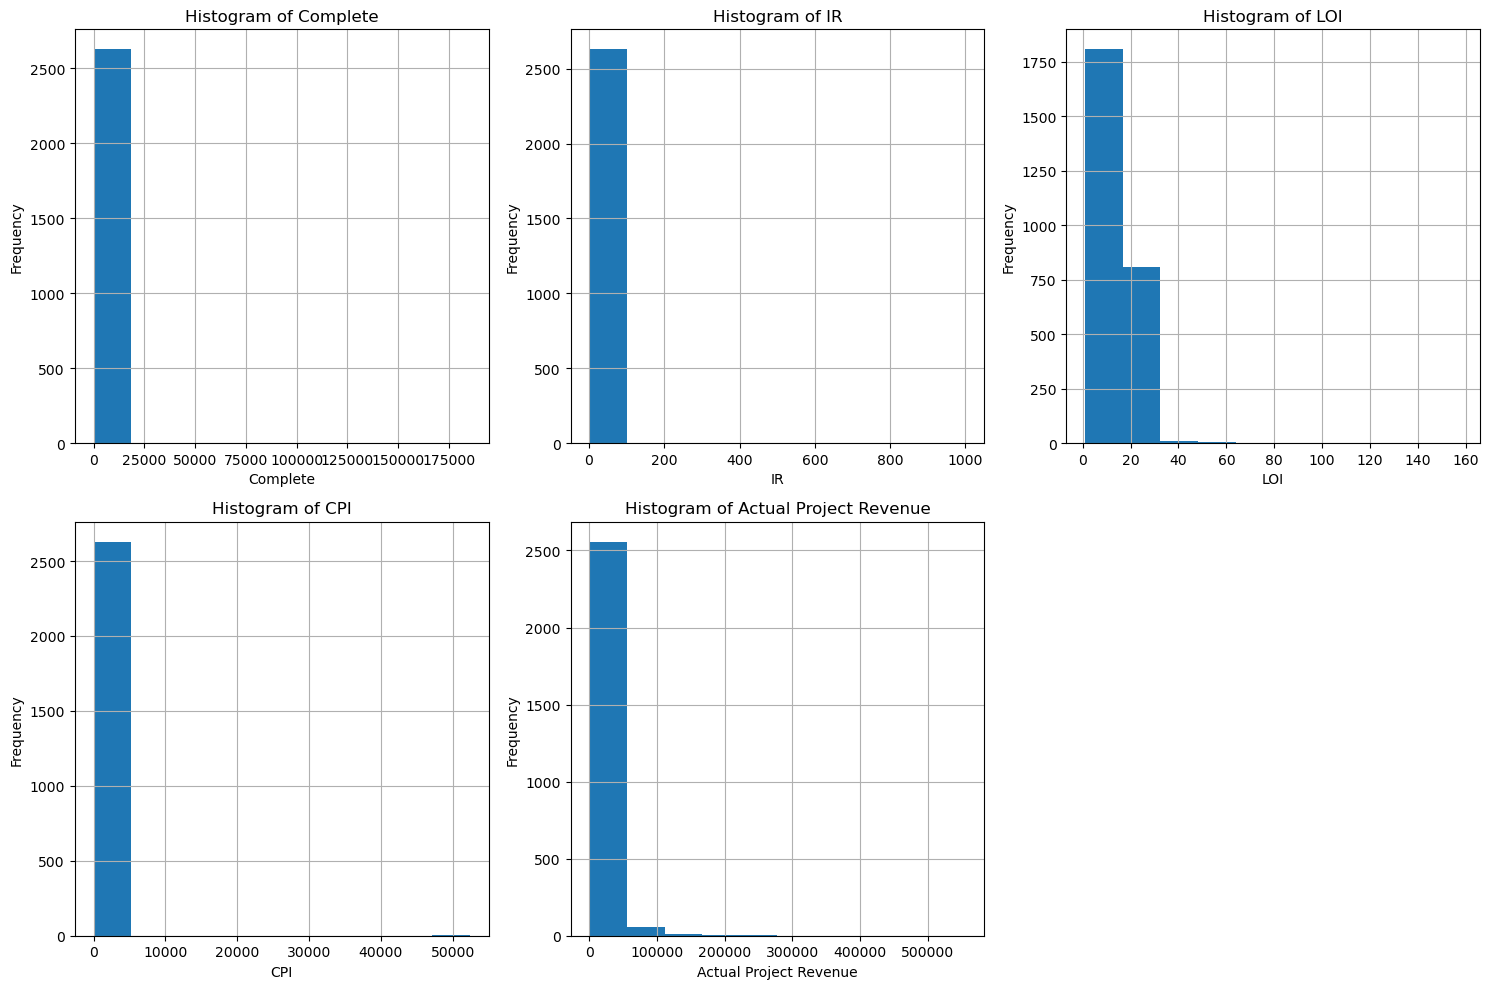

In [53]:
#Plot histograms to understand the structure of the data
if num_cols == 0:
    print("No numeric columns found in the DataFrame.")

num_rows = int(num_cols**0.5)  
num_cols_grid = (num_cols + num_rows - 1) // num_rows  

fig, axes = plt.subplots(num_rows, num_cols_grid, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(l_numeric_cols):
    ax = axes[i]
    ax.hist(final[col], bins=10)
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.grid(True)

if num_cols < len(axes):
    for j in range(num_cols, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout() 
plt.show()

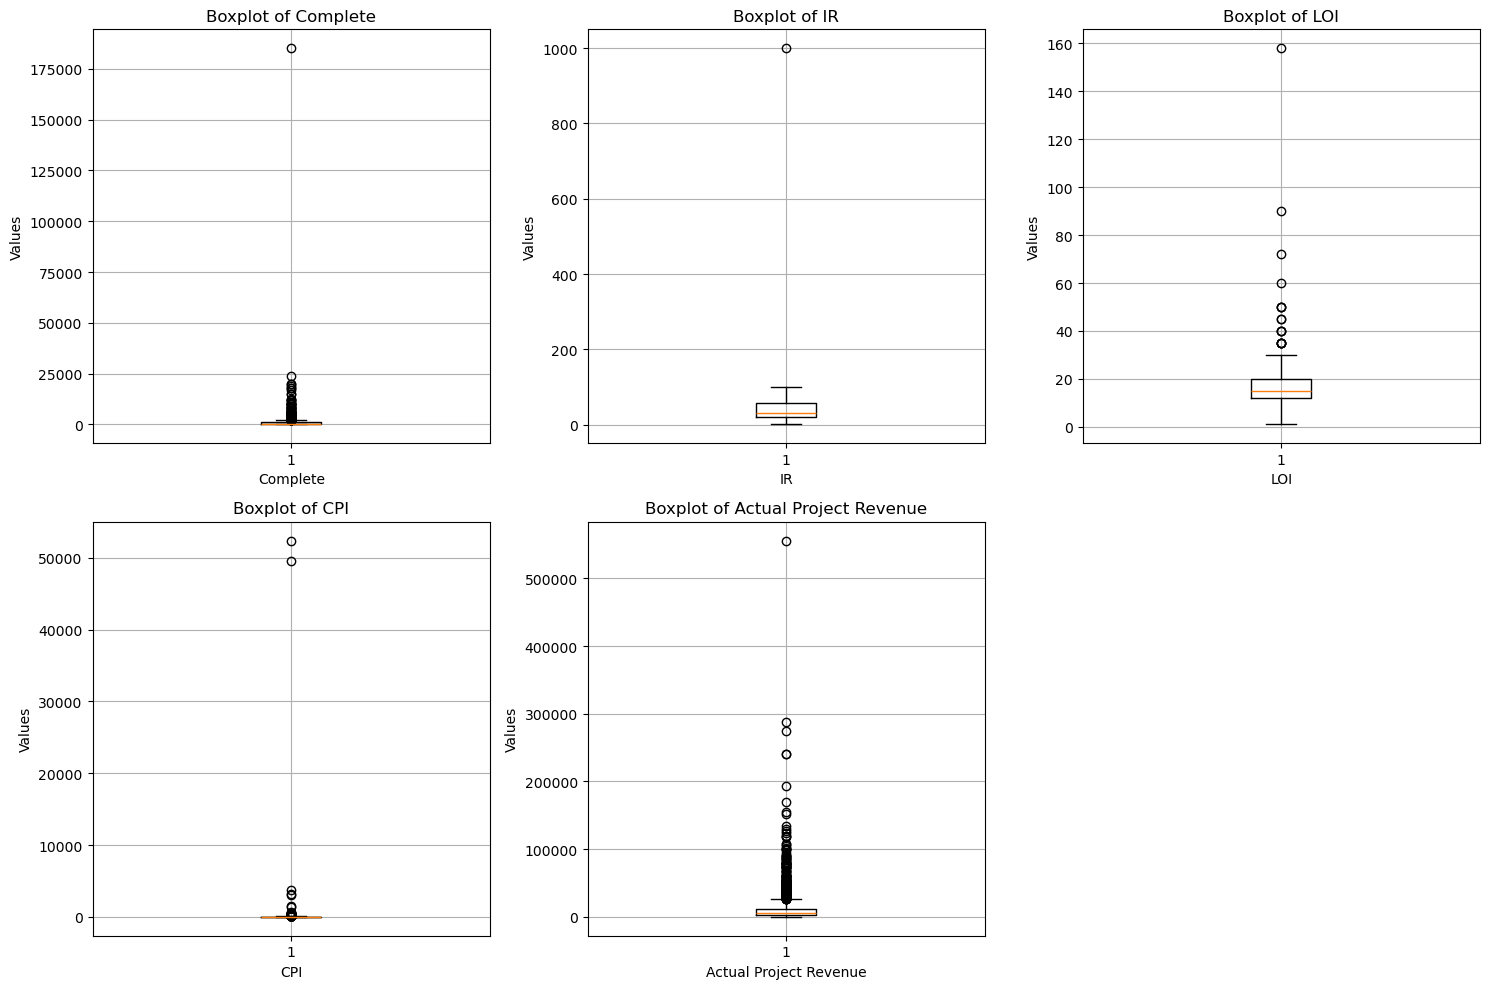

In [54]:
#boxplot
fig, axes = plt.subplots(num_rows, num_cols_grid, figsize=(15,10))
axes = axes.flatten()

for i, col in enumerate(l_numeric_cols):
    ax = axes[i]
    ax.boxplot(final[col])
    ax.set_title(f'Boxplot of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Values')
    ax.grid(True)

if num_cols < len(axes):
    for j in range(num_cols, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [55]:
#Data shape before removing outliers
final.shape

(2632, 7)

#### IQR

In [57]:
final_cleaned = final.copy()
for col in l_numeric_cols:
    Q1 = final_cleaned[col].quantile(0.25)
    Q3 = final_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    final_cleaned = final_cleaned[(final_cleaned[col] >= lower_bound) & (final_cleaned[col] <= upper_bound)]

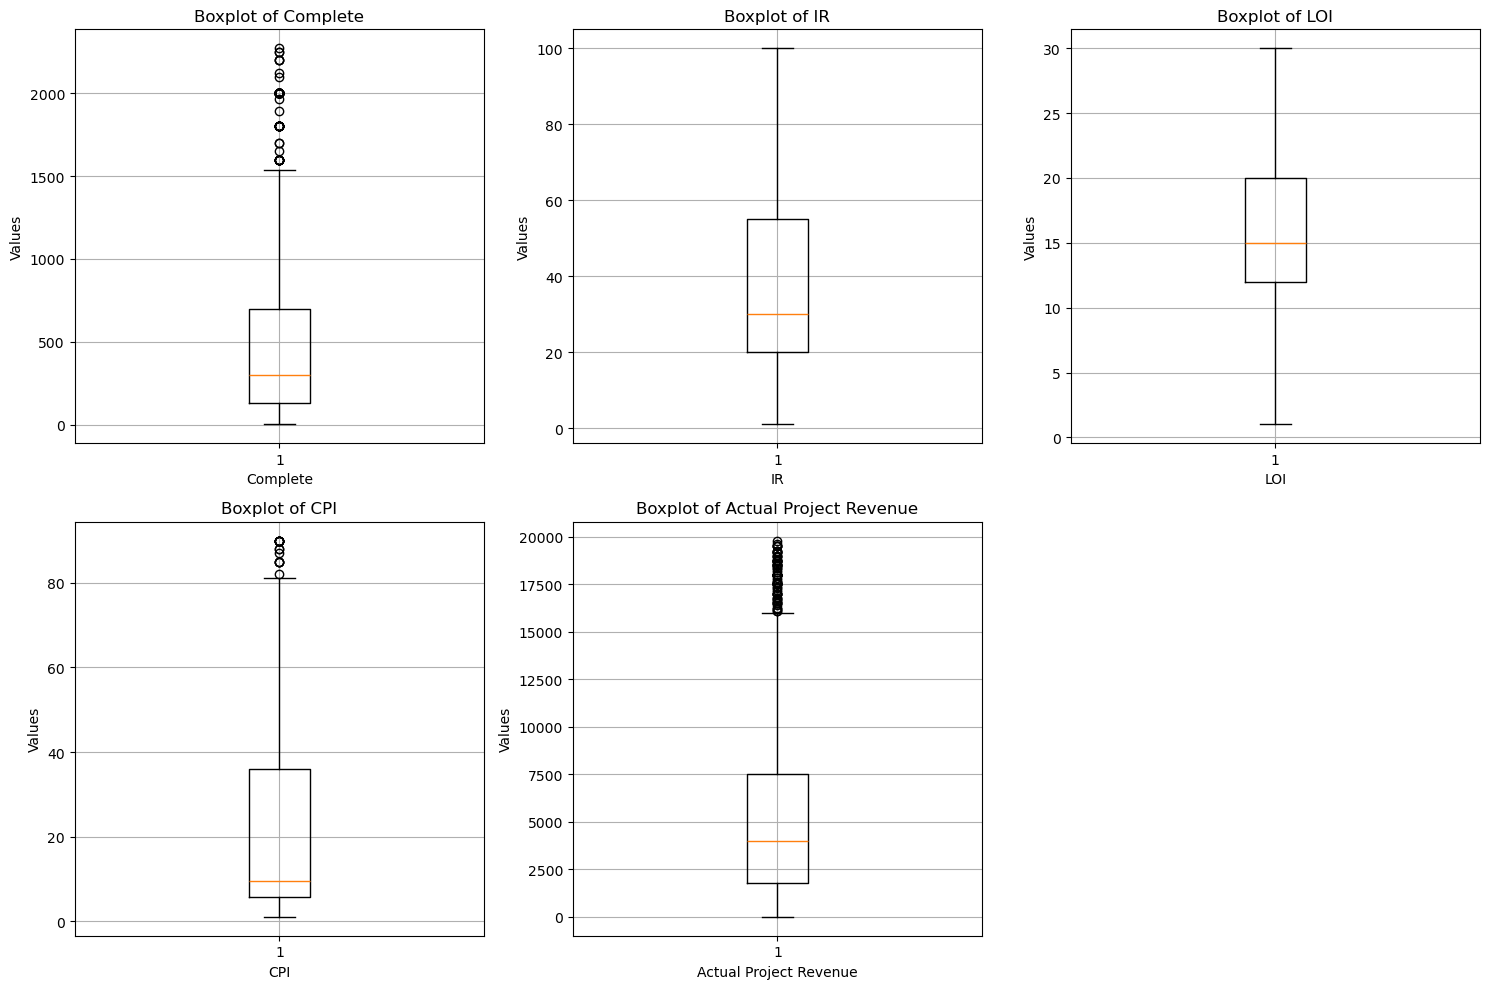

In [58]:
fig, axes = plt.subplots(num_rows, num_cols_grid, figsize=(15,10))
axes = axes.flatten()

for i, col in enumerate(l_numeric_cols):
    ax = axes[i]
    ax.boxplot(final_cleaned[col])
    ax.set_title(f'Boxplot of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Values')
    ax.grid(True)

if num_cols < len(axes):
    for j in range(num_cols, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [59]:
final_cleaned.shape

(2041, 7)

In [60]:
final_cleaned['Status'] = 'Lost'
final_cleaned.head()

,Complete,IR,LOI,CPI,Actual Project Revenue,Client Name,Category,Status
19,1000.0,80.0,10.0,2.5,2500.0,Inspired Insight,Consumer,Lost
20,45.0,20.0,30.0,38.0,1710.0,Comscore,Consumer,Lost
21,45.0,20.0,30.0,38.0,1710.0,Comscore,Consumer,Lost
22,400.0,21.0,18.0,9.0,3600.0,Radius Global Market Research,Consumer,Lost
23,600.0,30.0,18.0,5.5,3300.0,TRC Market Research,Consumer,Lost


In [61]:
final_cleaned.to_excel('l_new.xlsx', index=False)

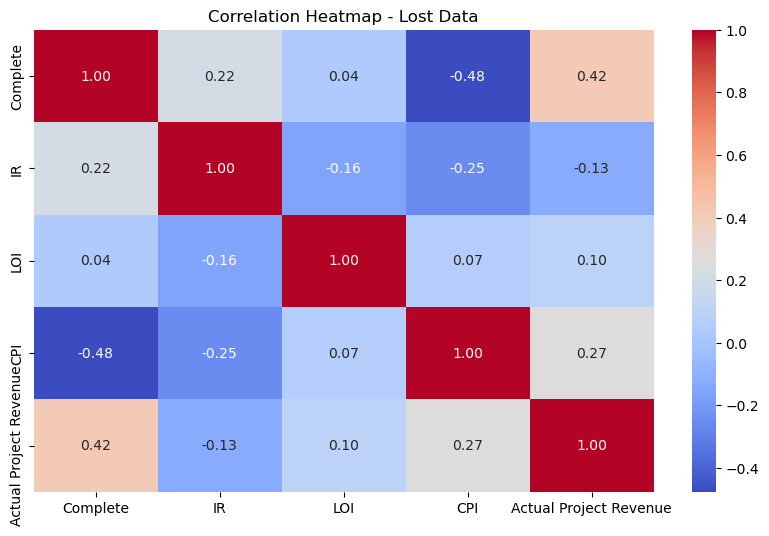

In [62]:
# Correlation heatmap for numerical columns
final_cleaned = final_cleaned.select_dtypes(include=np.number)
plt.figure(figsize=(10, 6))
sns.heatmap(final_cleaned.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap - Lost Data")
plt.show()

### Merging Files

In [64]:
df1 = pd.read_excel('in_new.xlsx')
df1.head()

,Actual Project Revenue,Client Name,Category,Complete,CPI,IR,LOI,Status
0,374.5,Harris Insights & Analytics LLC,Consumer,107,3.5,38.77,9.20,Invoiced
1,8008.0,Povaddo,Consumer,1001,8.0,47.78,7.52,Invoiced
2,8008.0,Povaddo,Consumer,1001,8.0,81.98,6.53,Invoiced
3,9009.0,Povaddo,Consumer,1001,9.0,48.57,6.75,Invoiced
4,9090.0,Povaddo,Consumer,1010,9.0,38.26,9.95,Invoiced


In [65]:
df2 = pd.read_excel('l_new.xlsx')
df2.head()

,Complete,IR,LOI,CPI,Actual Project Revenue,Client Name,Category,Status
0,1000,80.0,10.0,2.5,2500.0,Inspired Insight,Consumer,Lost
1,45,20.0,30.0,38.0,1710.0,Comscore,Consumer,Lost
2,45,20.0,30.0,38.0,1710.0,Comscore,Consumer,Lost
3,400,21.0,18.0,9.0,3600.0,Radius Global Market Research,Consumer,Lost
4,600,30.0,18.0,5.5,3300.0,TRC Market Research,Consumer,Lost


In [66]:
joined_df = pd.concat([df1,df2])
joined_df.head()

,Actual Project Revenue,Client Name,Category,Complete,CPI,IR,LOI,Status
0,374.5,Harris Insights & Analytics LLC,Consumer,107,3.5,38.77,9.20,Invoiced
1,8008.0,Povaddo,Consumer,1001,8.0,47.78,7.52,Invoiced
2,8008.0,Povaddo,Consumer,1001,8.0,81.98,6.53,Invoiced
3,9009.0,Povaddo,Consumer,1001,9.0,48.57,6.75,Invoiced
4,9090.0,Povaddo,Consumer,1010,9.0,38.26,9.95,Invoiced


In [67]:
joined_df['Client Name'] = joined_df['Client Name'].replace({'Brighton Avenue LLC': 'Brighton Avenue, LLC', 'Brookmark Research Services LLC':'Brookmark Research Services, LLC','Escalent':'Escalent Inc.', 'FastFocus LLC':'Fast Focus','Global Strategy Group':'Global Strategy Group, LLC','Harris Insights & Analytics LLC':'Harris Insights & Analytics','Helical Research':'Helical Research Inc.','J.D. Power and Associates, Inc.':'J.D. Power','Nonfiction Research LLC':'Nonfiction Research, LLC','Povaddo':'Povaddo, LLC','Research & Marketing Strategies, Inc.':'Research & Marketing Strategies Inc.','Research Results, Inc':'Research Results Inc','Triad Research Group':'Triad Research Group Inc','thinktank research & strategy':'ThinkTank Research & Stratergy','ThinkTank Research':'ThinkTank Research & Stratergy'})
joined_df.head()

,Actual Project Revenue,Client Name,Category,Complete,CPI,IR,LOI,Status
0,374.5,Harris Insights & Analytics,Consumer,107,3.5,38.77,9.20,Invoiced
1,8008.0,"Povaddo, LLC",Consumer,1001,8.0,47.78,7.52,Invoiced
2,8008.0,"Povaddo, LLC",Consumer,1001,8.0,81.98,6.53,Invoiced
3,9009.0,"Povaddo, LLC",Consumer,1001,9.0,48.57,6.75,Invoiced
4,9090.0,"Povaddo, LLC",Consumer,1010,9.0,38.26,9.95,Invoiced


In [68]:
seg_df = pd.read_excel('Account+List+with+Segment.xlsx')
seg_df.head()

,Record Id,Account Name,Client Segment Type,Account Owner
0,zcrm_4508063000109315008,Shoptology,Automater,Whitney Giordano
1,zcrm_4508063000094477806,Ironwood Insights Group,Automater,Bud Conner
2,zcrm_4508063000087278239,Finch Brands,Automater,Courtney Hocking
3,zcrm_4508063000049301099,Marcus Thomas LLC,Automater,Courtney Hocking
4,zcrm_4508063000019791917,Stormy Lake Consulting,Automater,Courtney Hocking


In [69]:
seg_df=seg_df.drop(columns = ['Record Id','Account Owner'])
seg_df=seg_df.rename(columns = {'Account Name':'Client Name'})
seg_df.head()

,Client Name,Client Segment Type
0,Shoptology,Automater
1,Ironwood Insights Group,Automater
2,Finch Brands,Automater
3,Marcus Thomas LLC,Automater
4,Stormy Lake Consulting,Automater


In [70]:
merged_df = pd.merge(joined_df, seg_df, on='Client Name', how='left')
merged_df.head()

,Actual Project Revenue,Client Name,Category,Complete,CPI,IR,LOI,Status,Client Segment Type
0,374.5,Harris Insights & Analytics,Consumer,107,3.5,38.77,9.20,Invoiced,Blender
1,8008.0,"Povaddo, LLC",Consumer,1001,8.0,47.78,7.52,Invoiced,One Stop Shopper
2,8008.0,"Povaddo, LLC",Consumer,1001,8.0,81.98,6.53,Invoiced,One Stop Shopper
3,9009.0,"Povaddo, LLC",Consumer,1001,9.0,48.57,6.75,Invoiced,One Stop Shopper
4,9090.0,"Povaddo, LLC",Consumer,1010,9.0,38.26,9.95,Invoiced,One Stop Shopper


In [71]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2558 entries, 0 to 2557
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Actual Project Revenue  2558 non-null   float64
 1   Client Name             2558 non-null   object 
 2   Category                2558 non-null   object 
 3   Complete                2558 non-null   int64  
 4   CPI                     2558 non-null   float64
 5   IR                      2558 non-null   float64
 6   LOI                     2558 non-null   float64
 7   Status                  2558 non-null   object 
 8   Client Segment Type     2452 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 180.0+ KB


In [72]:
merged_df['Client Segment Type'] = merged_df['Client Segment Type'].fillna('Unknown')
merged_df.info()
merged_df.to_excel('merged_new.xlsx', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2558 entries, 0 to 2557
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Actual Project Revenue  2558 non-null   float64
 1   Client Name             2558 non-null   object 
 2   Category                2558 non-null   object 
 3   Complete                2558 non-null   int64  
 4   CPI                     2558 non-null   float64
 5   IR                      2558 non-null   float64
 6   LOI                     2558 non-null   float64
 7   Status                  2558 non-null   object 
 8   Client Segment Type     2558 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 180.0+ KB
